In [3]:
from datetime import datetime
print(datetime.now().strftime('This code ran on %Y-%m-%d %H:%M:%S \n'))

!python3 --version
print()

#!ls -al
!nvidia-smi

This code ran on 2024-11-23 22:06:34 

Python 3.11.9

Sat Nov 23 22:06:34 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.14              Driver Version: 550.54.14      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          Off |   00000000:02:00.0 Off |                    0 |
| N/A   75C    P0            209W /  300W |   33114MiB /  81920MiB |    100%      Default |
|                                         |                        |             Disab

In [1]:
%cd ~/git-repos/Visual-Data-Mining-AI-Model/training 

#works 11B
!torchrun --nnodes 1 --nproc_per_node 4  finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 3 --batch_size_training 8 --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "web_scraper_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora

#testing 90B
#from huggingface_hub import snapshot_download

#snapshot_download(
#    repo_id="meta-llama/Llama-3.2-90B-Vision-Instruct",
#    #token="your_huggingface_token"
#)
#!torchrun --nnodes 1 --nproc_per_node 4  finetuning.py --enable_fsdp --lr 1e-5  --num_epochs 1 --batch_size_training 8 --model_name meta-llama/Llama-3.2-90B-Vision-Instruct --dist_checkpoint_root_folder ./finetuned_model --dist_checkpoint_folder fine-tuned  --use_fast_kernels --dataset "custom_dataset" --custom_dataset.test_split "test" --custom_dataset.file "web_scraper_dataset.py"  --run_validation True --batching_strategy padding  --use_peft --peft_method lora


/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/training


/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


W1123 18:08:24.209000 586117 torch/distributed/run.py:793] 
W1123 18:08:24.209000 586117 torch/distributed/run.py:793] *****************************************
W1123 18:08:24.209000 586117 torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1123 18:08:24.209000 586117 torch/distributed/run.py:793] *****************************************
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/llama_recipes/model_checkpointing/checkpoint_handler.py:17: DeprecationWarning: `torch.distributed._shard.checkpoint` will be deprecated, use `torch.distributed.checkpoint` instead
  from torch.distributed._shard.checkpoint import (
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/llama_recipes/mo

In [2]:
!torchrun --nnodes 1 --nproc_per_node 4 finetuning.py \
    --enable_fsdp \
    --lr 1e-5 \
    --num_epochs 5 \
    --batch_size_training 8 \
    --model_name meta-llama/Llama-3.2-11B-Vision-Instruct \
    --dist_checkpoint_root_folder ./finetuned_model \
    --dist_checkpoint_folder fine-tuned \
    --use_fast_kernels \
    --dataset "custom_dataset" \
    --custom_dataset.test_split "test" \
    --custom_dataset.file "web_scraper_dataset.py" \
    --run_validation True \
    --batching_strategy padding \
    --use_peft \
    --peft_method lora\
    --output_dir "finetuned_model/fine-tuned/peft_weights/" \
    --use_wandb True 
    #--train_config.from_peft_checkpoint "finetuned_model/fine-tuned/peft_weights/"  

  


W1124 11:16:22.895000 750389 torch/distributed/run.py:793] 
W1124 11:16:22.895000 750389 torch/distributed/run.py:793] *****************************************
W1124 11:16:22.895000 750389 torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1124 11:16:22.895000 750389 torch/distributed/run.py:793] *****************************************
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/llama_recipes/model_checkpointing/checkpoint_handler.py:17: DeprecationWarning: `torch.distributed._shard.checkpoint` will be deprecated, use `torch.distributed.checkpoint` instead
  from torch.distributed._shard.checkpoint import (
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/llama_recipes/mo

In [ ]:
#full finetune working
!torchrun --nnodes 1 --nproc_per_node 4 finetuning.py \
    --enable_fsdp \
    --lr 1e-5 \
    --num_epochs 1 \
    --batch_size_training 8 \
    --model_name meta-llama/Llama-3.2-11B-Vision-Instruct \
    --dist_checkpoint_root_folder ./finetuned_model \
    --dist_checkpoint_folder fine-tuned \
    --use_fast_kernels \
    --dataset "custom_dataset" \
    --custom_dataset.test_split "test" \
    --custom_dataset.file "web_scraper_dataset.py" \
    --run_validation True \
    --batching_strategy padding \
    --output_dir "finetuned_model/fine-tuned/" \
    --use_wandb True 

  


W1125 12:32:24.450000 1012052 torch/distributed/run.py:793] 
W1125 12:32:24.450000 1012052 torch/distributed/run.py:793] *****************************************
W1125 12:32:24.450000 1012052 torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1125 12:32:24.450000 1012052 torch/distributed/run.py:793] *****************************************
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/llama_recipes/model_checkpointing/checkpoint_handler.py:17: DeprecationWarning: `torch.distributed._shard.checkpoint` will be deprecated, use `torch.distributed.checkpoint` instead
  from torch.distributed._shard.checkpoint import (
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/venv_visual_data_mining/lib64/python3.11/site-packages/llama_recipe

In [6]:
#display the format of the dataset

from datasets import load_dataset
from huggingface_hub import HfApi

# Load the original dataset
my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
reference_dataset = load_dataset("HuggingFaceM4/the_cauldron", name="ocrvqa")

print(my_dataset)
print(reference_dataset)
print()

print(my_dataset.column_names)
print(reference_dataset.column_names)
print()

import pprint
pp = pprint.PrettyPrinter(indent=2)
print("My dataset first sample:")
pp.pprint(my_dataset['train'][0])
print("\nReference dataset first sample:")
pp.pprint(reference_dataset['train'][0])
print()

print(my_dataset['train'][0]['images'])
print(reference_dataset['train'][0]['images'])

print(type(my_dataset['train'][0]['images']))
print(type(reference_dataset['train'][0]['images']))


DatasetDict({
    train: Dataset({
        features: ['images', 'texts'],
        num_rows: 15937
    })
})
DatasetDict({
    train: Dataset({
        features: ['images', 'texts'],
        num_rows: 165746
    })
})

{'train': ['images', 'texts']}
{'train': ['images', 'texts']}

My dataset first sample:
{ 'images': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1280x720 at 0x7F827C4F6D90>,
  'texts': [ { 'assistant': '[79.92, 7.64, 85.31, 10.42]',
               'source': 'web_scraper',
               'user': 'Return the bounding box of the Text link with the '
                       "words 'About Us'. It's used to navigate to the About "
                       'Us section of the website and if we click it the About '
                       'Us section will load.'}]}

Reference dataset first sample:
{ 'images': [ <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=380x500 at 0x7F827C51F850>],
  'texts': [ { 'assistant': 'David MACAULAY.',
               'source': 'ocrvqa',
 

In [7]:
#from datasets import load_dataset

#!python inference.py --model_name meta-llama/Llama-3.2-11B-Vision-Instruct --prompt_file prompt.txt --peft_model PATH/to/save/PEFT/model/ --use_auditnlg
#!wget --header="User-Agent: Mozilla/5.0" https://images.pexels.com/photos/45201/kitty-cat-kitten-pet-45201.jpeg -O kitty-cat.jpg

#my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
#print(my_dataset['train'][0]['images'])
#print(my_dataset['train'][0]['texts'])

#!python multi_modal_infer.py --image_path kitty-cat.jpg --prompt_text "What is the bounding box for the kittens face?" --temperature 0.5 --top_p 0.8 --model_name "meta-llama/Llama-3.2-11B-Vision-Instruct" --peft_model_path "PATH/to/save/PEFT/model/"






The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

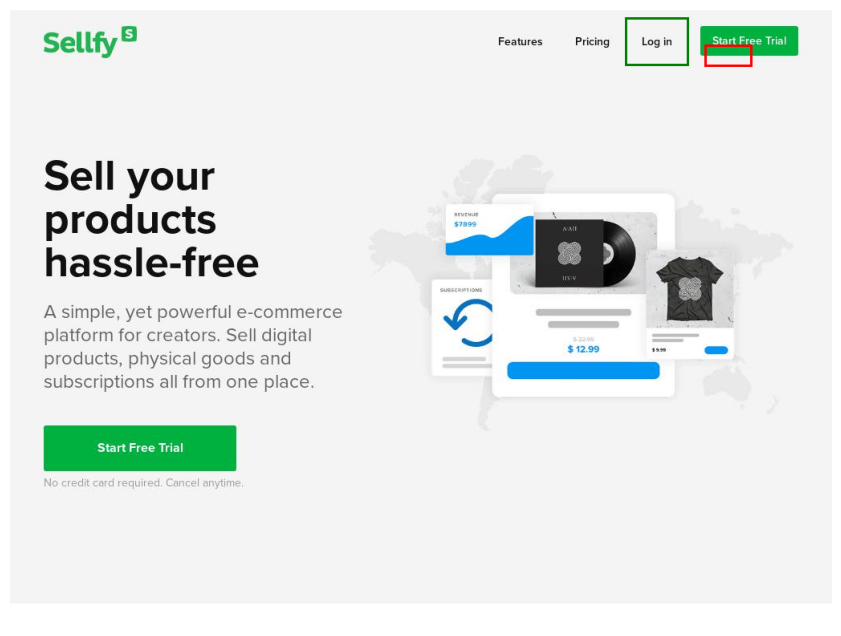

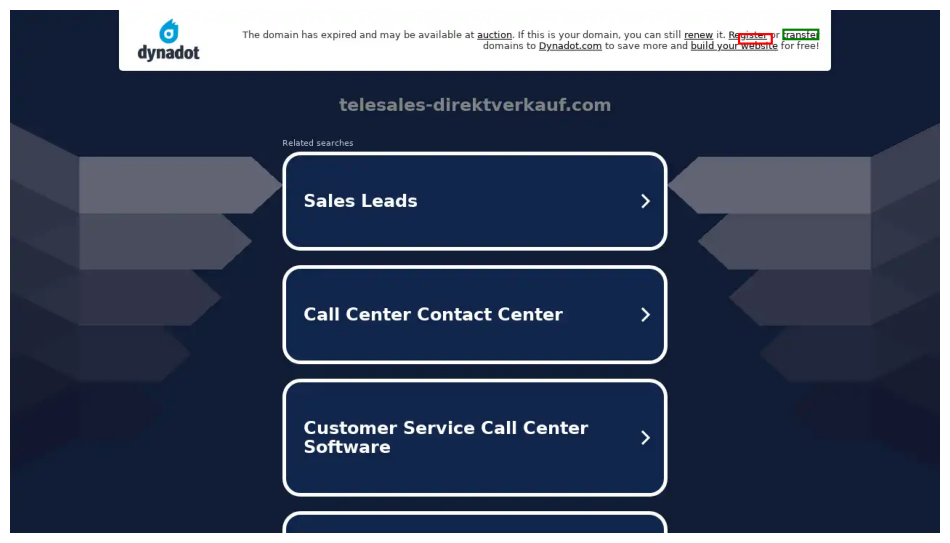

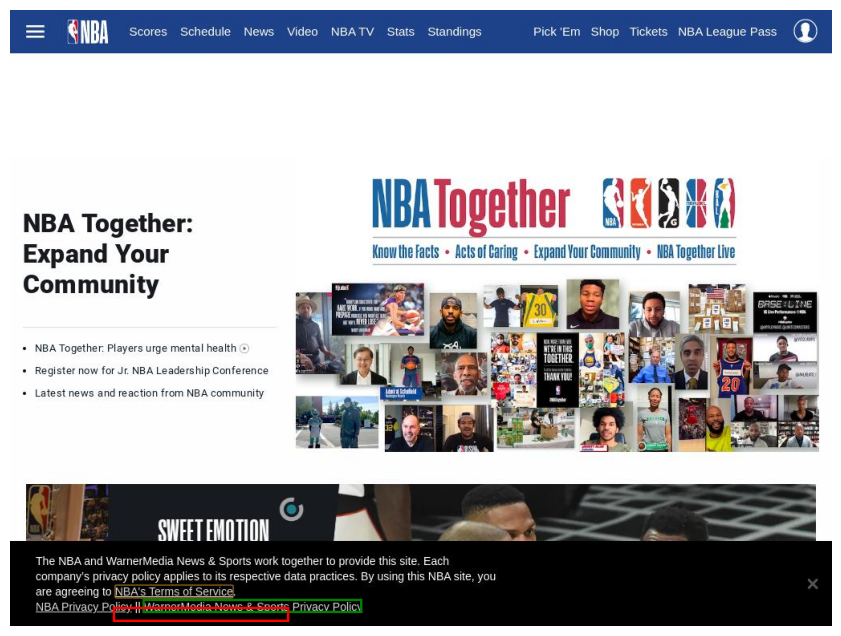

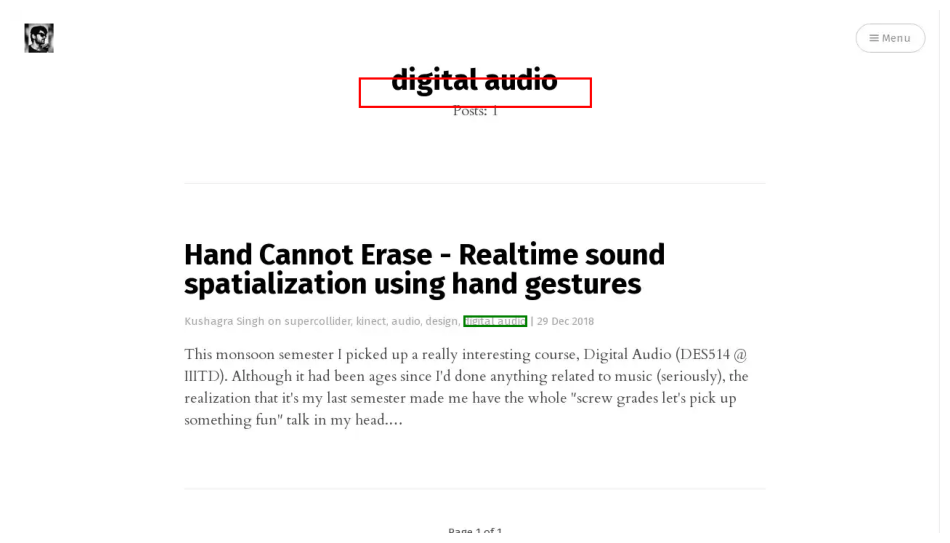

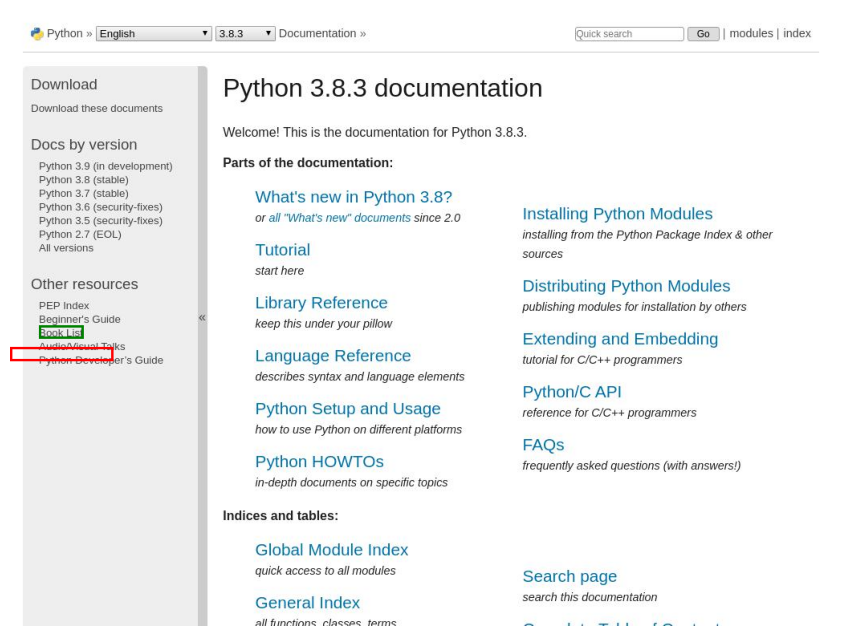

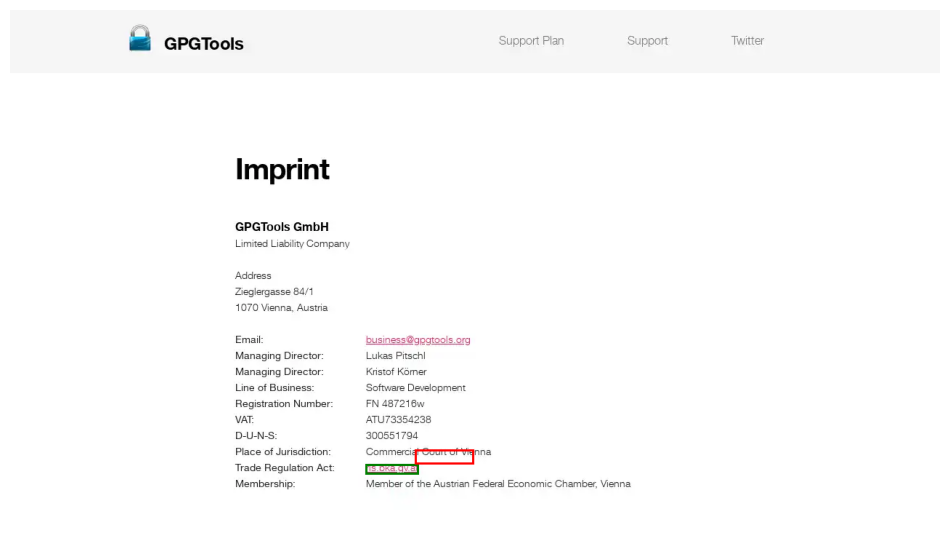

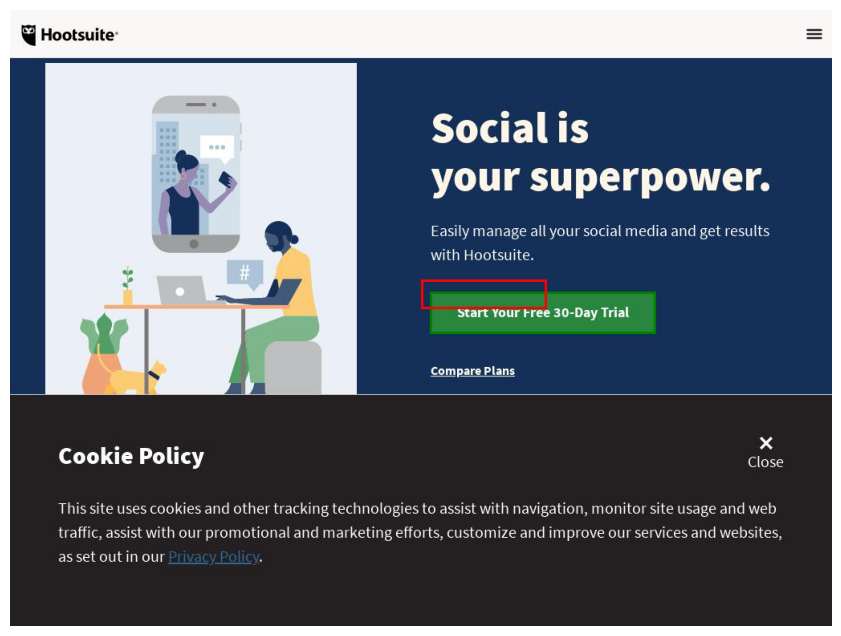

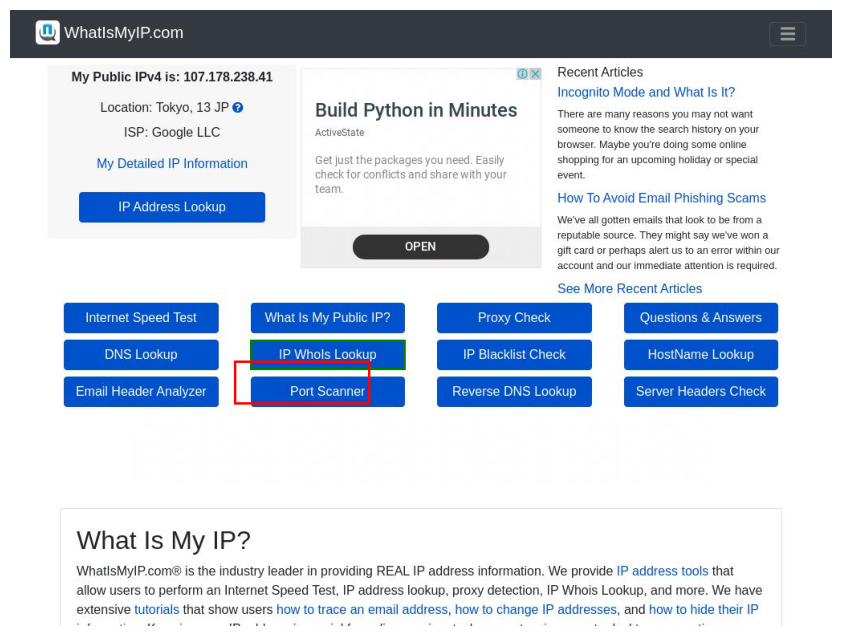

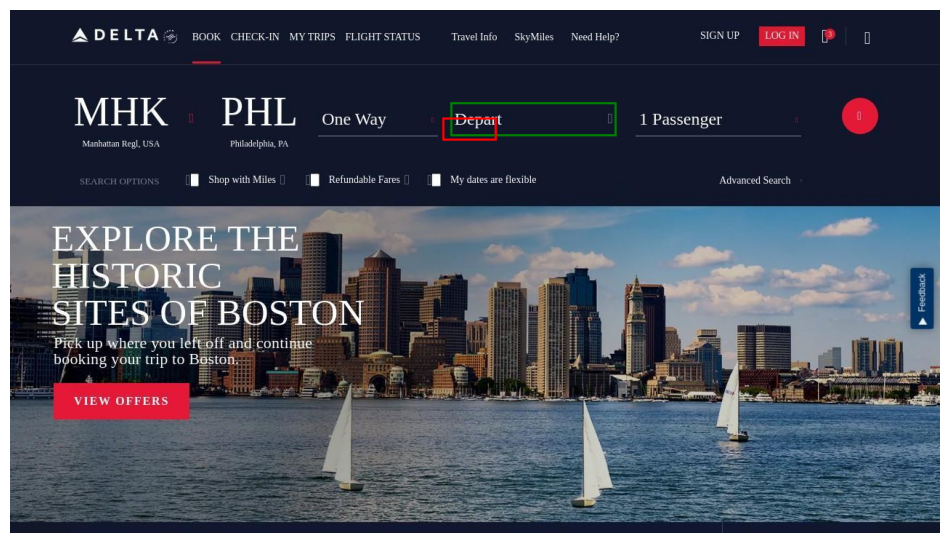

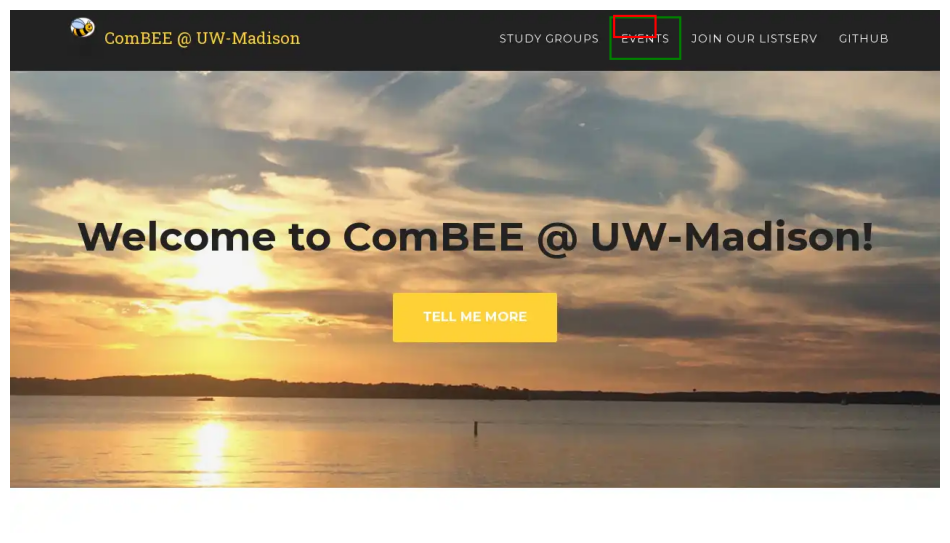

In [8]:
import torch
import gc
from contextlib import contextmanager
import tempfile
from datasets import load_dataset
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from transformers import MllamaForConditionalGeneration, MllamaProcessor

class ModelMemoryManager:
    @contextmanager
    def load_model(self, model_class, model_name, processor_class=None, peft_model_path=None, **kwargs):
        try:
            model = model_class.from_pretrained(model_name, **kwargs)
            if peft_model_path:
                from peft import PeftModel
                model = PeftModel.from_pretrained(model, peft_model_path)
            processor = processor_class.from_pretrained(model_name) if processor_class else None
            yield model, processor
        finally:
            del model
            if processor:
                del processor
            torch.cuda.empty_cache()
            gc.collect()

def convert_to_pixels(bbox, image_size):
    x_res, y_res = image_size
    return [
        bbox[0] * x_res / 100,
        bbox[1] * y_res / 100,
        bbox[2] * x_res / 100,
        bbox[3] * y_res / 100
    ]

def process_batch(model, processor, dataset, start_index, batch_size):
    for i in range(batch_size):
        index = start_index + i
        image = dataset['train'][index]['images']
        draw = ImageDraw.Draw(image)
        
        with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmp:
            image.save(tmp.name)
            prompt = dataset['train'][index]['texts'][0]['user']
            
            # Process image and generate text
            img_for_model = Image.open(tmp.name).convert("RGB")
            conversation = [
                {
                    "role": "user",
                    "content": [{"type": "image"}, {"type": "text", "text": prompt}],
                }
            ]
            prompt_text = processor.apply_chat_template(
                conversation, add_generation_prompt=True, tokenize=False
            )
            inputs = processor(img_for_model, prompt_text, return_tensors="pt").to(model.device)
            output = model.generate(
                **inputs,
                temperature=0.5,
                top_p=0.8,
                max_new_tokens=512,
            )
            pred = processor.decode(output[0])[len(prompt_text):]
            os.remove(tmp.name)
        
        # Process boxes after model inference
        true_box = [float(x) for x in dataset['train'][index]['texts'][0]['assistant'].strip('[]').split(',')]
        true_box_pixels = convert_to_pixels(true_box, image.size)
        
        try:
            pred_numbers = pred.split('|>')[1].split('<|')[0].strip()
            pred_box = [float(x) for x in pred_numbers.strip('[]').split(',')]
            pred_box_pixels = convert_to_pixels(pred_box, image.size)
            
            draw.rectangle(true_box_pixels, outline='green', width=3)
            draw.rectangle(pred_box_pixels, outline='red', width=3)
        except Exception as e:
            print(f"Error parsing prediction at index {index}: {e}")
            print(f"Raw prediction: {pred}")
        
        plt.figure(figsize=(12,8))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        plt.close()

# Main execution
my_dataset = load_dataset("jwaters8978/web_scraper_dataset")
manager = ModelMemoryManager()

with manager.load_model(
    MllamaForConditionalGeneration,
    "meta-llama/Llama-3.2-11B-Vision-Instruct",
    MllamaProcessor,
    peft_model_path="finetuned_model/fine-tuned/peft_weights/",
    torch_dtype=torch.bfloat16,
    device_map="auto",
    use_safetensors=True
) as (model, processor):
    # Process images in batches
    process_batch(model, processor, my_dataset, start_index=15903, batch_size=10)

In [7]:
from datasets import load_dataset

# Load and prepare initial dataset
dataset_dict = load_dataset("jwaters8978/web_scraper_dataset", name="default")
dataset = dataset_dict['train']
dataset = dataset.select(range(100))

# First split: 90% train, 10% temp
temp_dataset = dataset.train_test_split(test_size=0.8, shuffle=True, seed=42)
train_data = temp_dataset['train']  # 80%

# Second split: Split the temp into validation and test
val_test_dataset = temp_dataset['test'].train_test_split(test_size=0.5, shuffle=True, seed=42)
val_data = val_test_dataset['train']    # 10%
test_data = val_test_dataset['test']    # 10%

print("Train size:", len(train_data))
print("Validation size:", len(val_data))
print("Test size:", len(test_data))




Train size: 70
Validation size: 15
Test size: 15


In [1]:
import torch
import gc
from contextlib import contextmanager
from datasets import load_dataset
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from transformers import MllamaForConditionalGeneration, MllamaProcessor
import math
import numpy as np

class ModelMemoryManager:
   @contextmanager
   def load_model(self, model_class, model_name, processor_class=None, peft_model_path=None, **kwargs):
       try:
           model = model_class.from_pretrained(model_name, **kwargs)
           if peft_model_path:
               from peft import PeftModel
               model = PeftModel.from_pretrained(model, peft_model_path)
           processor = processor_class.from_pretrained(model_name) if processor_class else None
           yield model, processor
       finally:
           del model
           if processor:
               del processor
           torch.cuda.empty_cache()
           gc.collect()

def convert_to_pixels(bbox, image_size):
   x_res, y_res = image_size
   return [
       bbox[0] * x_res / 100,
       bbox[1] * y_res / 100,
       bbox[2] * x_res / 100,
       bbox[3] * y_res / 100
   ]

def calculate_distance(point1, point2):
   return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def process_batch(model, processor, dataset, start_index, batch_size, show_images=False):
   # Initialize error tracking
   total_error_p1 = 0
   total_error_p2 = 0
   errors_p1 = []  # List to store all errors for std calculation
   errors_p2 = []
   successful_predictions = 0
   failed_predictions = []
   
   for i in range(batch_size):
       index = start_index + i
       image = dataset[index]['images']
       prompt = dataset[index]['texts'][0]['user']
       
       # Process image directly without temp file
       img_for_model = image.convert("RGB")
       conversation = [
           {
               "role": "user",
               "content": [{"type": "image"}, {"type": "text", "text": prompt}],
           }
       ]
       prompt_text = processor.apply_chat_template(
           conversation, add_generation_prompt=True, tokenize=False
       )
       inputs = processor(img_for_model, prompt_text, return_tensors="pt").to(model.device)
       output = model.generate(
           **inputs,
           temperature=0.5,
           top_p=0.8,
           max_new_tokens=512,
       )
       pred = processor.decode(output[0])[len(prompt_text):]
       
       # Process boxes after model inference
       true_box = [float(x) for x in dataset[index]['texts'][0]['assistant'].strip('[]').split(',')]
       true_box_pixels = convert_to_pixels(true_box, image.size)
       
       try:
           pred_numbers = pred.split('|>')[1].split('<|')[0].strip()
           pred_box = [float(x) for x in pred_numbers.strip('[]').split(',')]
           pred_box_pixels = convert_to_pixels(pred_box, image.size)
           
           # Calculate distances for both points
           p1_distance = calculate_distance(
               [true_box_pixels[0], true_box_pixels[1]], 
               [pred_box_pixels[0], pred_box_pixels[1]]
           )
           p2_distance = calculate_distance(
               [true_box_pixels[2], true_box_pixels[3]], 
               [pred_box_pixels[2], pred_box_pixels[3]]
           )
           
           total_error_p1 += p1_distance
           total_error_p2 += p2_distance
           errors_p1.append(p1_distance)
           errors_p2.append(p2_distance)
           successful_predictions += 1
           
           if show_images:
               draw = ImageDraw.Draw(image)
               draw.rectangle(true_box_pixels, outline='green', width=3)
               draw.rectangle(pred_box_pixels, outline='red', width=3)
               plt.figure(figsize=(12,8))
               plt.imshow(image)
               plt.axis('off')
               plt.show()
               plt.close()
               
               # Print metrics after each image
               print(f"\nMetrics for image {index}:")
               print(f"Point 1 (x1,y1) error: {p1_distance:.2f} pixels")
               print(f"Point 2 (x2,y2) error: {p2_distance:.2f} pixels")
               print(f"Average error: {(p1_distance + p2_distance)/2:.2f} pixels")
           
       except Exception as e:
           print(f"Error parsing prediction at index {index}: {e}")
           print(f"Raw prediction: {pred}")
           failed_predictions.append(index)
   
   # Print final statistics
   if successful_predictions > 0:
       avg_error_p1 = total_error_p1 / successful_predictions
       avg_error_p2 = total_error_p2 / successful_predictions
       std_p1 = np.std(errors_p1)
       std_p2 = np.std(errors_p2)
       
       print(f"\nFinal Results:")
       print(f"Point 1 (x1,y1):")
       print(f"  Average distance error: {avg_error_p1:.2f} pixels")
       print(f"  Standard deviation: {std_p1:.2f} pixels")
       print(f"\nPoint 2 (x2,y2):")
       print(f"  Average distance error: {avg_error_p2:.2f} pixels")
       print(f"  Standard deviation: {std_p2:.2f} pixels")
       print(f"\nOverall:")
       print(f"  Average distance error: {(avg_error_p1 + avg_error_p2)/2:.2f} pixels")
       print(f"  Average standard deviation: {(std_p1 + std_p2)/2:.2f} pixels")
       print(f"  Successful predictions: {successful_predictions}")
   print(f"Failed predictions at indices: {failed_predictions}")
   print(f"Number of failures: {len(failed_predictions)}")

# First do the dataset loading and splitting
split_ratio = 0.9
dataset_dict = load_dataset("jwaters8978/web_scraper_dataset", name="default")
dataset = dataset_dict['train']
#dataset = dataset.select(range(100))

# First split into train and temp
temp_dataset = dataset.train_test_split(test_size=0.2, shuffle=True, seed=42)
train_data = temp_dataset['train']  # 80%

# Second split: Split the temp into validation and test
val_test_dataset = temp_dataset['test'].train_test_split(test_size=0.5, shuffle=True, seed=42)
val_data = val_test_dataset['train']    # 10%
test_data = val_test_dataset['test']    # 10%

# Main execution
manager = ModelMemoryManager()
with manager.load_model(
   MllamaForConditionalGeneration,
   "meta-llama/Llama-3.2-11B-Vision-Instruct",
   MllamaProcessor,
   peft_model_path="finetuned_model/fine-tuned/peft_weights/",
   torch_dtype=torch.bfloat16,
   device_map="auto",
   use_safetensors=True
) as (model, processor):
   # Process images in batches using test_data
   # Set show_images=True if you want to see the visualizations
   process_batch(model, processor, test_data, start_index=0, batch_size=30, show_images=False)

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]


Metrics for image 0:
Point 1 (x1,y1) error: 23.05 pixels
Point 2 (x2,y2) error: 20.26 pixels
Average error: 21.66 pixels

Metrics for image 1:
Point 1 (x1,y1) error: 97.98 pixels
Point 2 (x2,y2) error: 129.60 pixels
Average error: 113.79 pixels

Metrics for image 2:
Point 1 (x1,y1) error: 29.37 pixels
Point 2 (x2,y2) error: 37.51 pixels
Average error: 33.44 pixels

Metrics for image 3:
Point 1 (x1,y1) error: 813.09 pixels
Point 2 (x2,y2) error: 147.84 pixels
Average error: 480.47 pixels

Metrics for image 4:
Point 1 (x1,y1) error: 104.84 pixels
Point 2 (x2,y2) error: 23.97 pixels
Average error: 64.40 pixels

Metrics for image 5:
Point 1 (x1,y1) error: 85.50 pixels
Point 2 (x2,y2) error: 76.70 pixels
Average error: 81.10 pixels

Metrics for image 6:
Point 1 (x1,y1) error: 66.20 pixels
Point 2 (x2,y2) error: 73.94 pixels
Average error: 70.07 pixels

Metrics for image 7:
Point 1 (x1,y1) error: 123.67 pixels
Point 2 (x2,y2) error: 105.32 pixels
Average error: 114.50 pixels

Metrics for im

In [1]:
!python3 accuracy_benchmark.py

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████████████| 5/5 [00:04<00:00,  1.09it/s]

Metrics for image 0:
Point 1 (x1,y1) error: 13.29 pixels
Point 2 (x2,y2) error: 11.78 pixels
Average error: 12.54 pixels

Metrics for image 1:
Point 1 (x1,y1) error: 47.22 pixels
Point 2 (x2,y2) error: 44.59 pixels
Average error: 45.90 pixels

Metrics for image 2:
Point 1 (x1,y1) error: 38.51 pixels
Point 2 (x2,y2) error: 25.87 pixels
Average error: 32.19 pixels

Final Results:
Point 1 (x1,y1):
  Average distance error: 33.01 pixels
  Standard deviation: 14.39 pixels

Point 2 (x2,y2):
  Average distance error: 27.42 pixels
  Standard deviation: 13.44 pixels

Overall:
  Average distance error: 30.21 pixels
  Average standard deviation: 13.91 pixels
  Successful predictions: 3
Failed predictions at indices: []
Number of failures: 0


In [13]:
! sbatch slurm_training.sh

sbatch: error: Unable to open file slurm_training.sh


In [4]:
!squeue

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
              3143 gpucluste slurm_ju   nobody  R    2:18:36      1 gpu01
              3158 gpucluste RLagents   nobody  R      13:03      1 gpu01
              3164 gpucluste     bash   nobody  R       5:36      1 gpu01
              3165 gpucluste nvidia_s   nobody  R       4:54      1 gpu01
              3166 gpucluste llama_tr   nobody  R       0:17      1 gpu01


In [11]:
%cd logs
! ls
!cat training_job_3166.log

[Errno 2] No such file or directory: 'logs'
/Users/924284072/git-repos/Visual-Data-Mining-AI-Model/training/logs
training_job_3166.log
Starting training job number 1 at Sat Nov 23 23:54:19 PST 2024
Running on node: gpu01
Starting fresh training without PEFT checkpoint
Current directory: /Users/924284072/git-repos/Visual-Data-Mining-AI-Model/training
Checkpoint directory structure:
./finetuned_model:
fine-tuned
fine-tuned_backup_job_1

./finetuned_model/fine-tuned:

./finetuned_model/fine-tuned_backup_job_1:
peft_weights

./finetuned_model/fine-tuned_backup_job_1/peft_weights:
adapter_config.json
adapter_model.safetensors
README.md
W1123 23:54:20.812000 689840 torch/distributed/run.py:793] 
W1123 23:54:20.812000 689840 torch/distributed/run.py:793] *****************************************
W1123 23:54:20.812000 689840 torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune 

In [4]:
!python3 accuracy_benchmark_synthetic.py

ANALYZING IMAGE ACCURACY
The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████████████| 5/5 [00:03<00:00,  1.27it/s]
Figure(1200x800)

Metrics for image 0:
Coordinate error: 2.00 pixels
Figure(1200x800)

Metrics for image 1:
Coordinate error: 27.29 pixels
Figure(1200x800)

Metrics for image 2:
Coordinate error: 10.30 pixels

Final Results:
Coordinate Prediction:
  Average distance error: 13.20 pixels
  Standard deviation: 10.53 pixels
  Successful predictions: 3
Failed predictions at indices: []
Number of failures: 0


ANALYZING IMAGE ACCURACY


The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

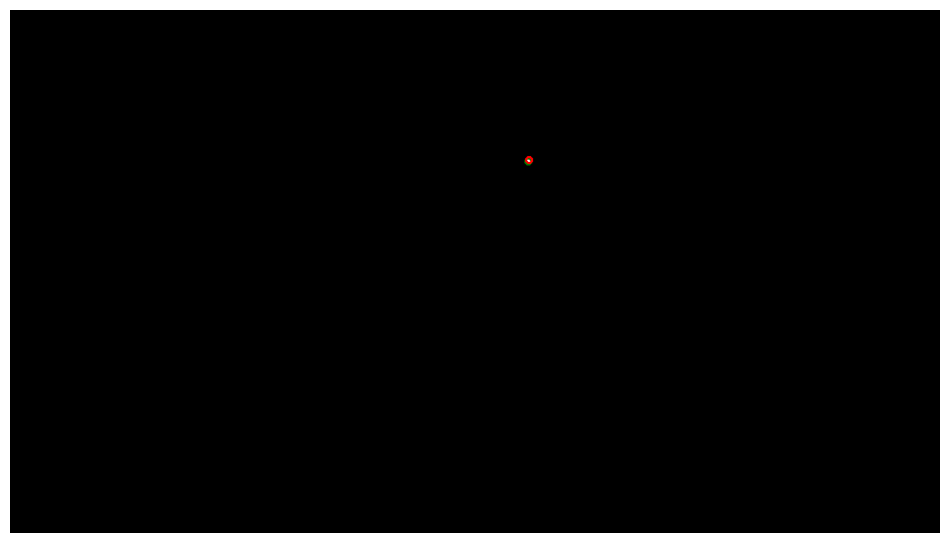


Metrics for image 0:
Coordinate error: 2.24 pixels


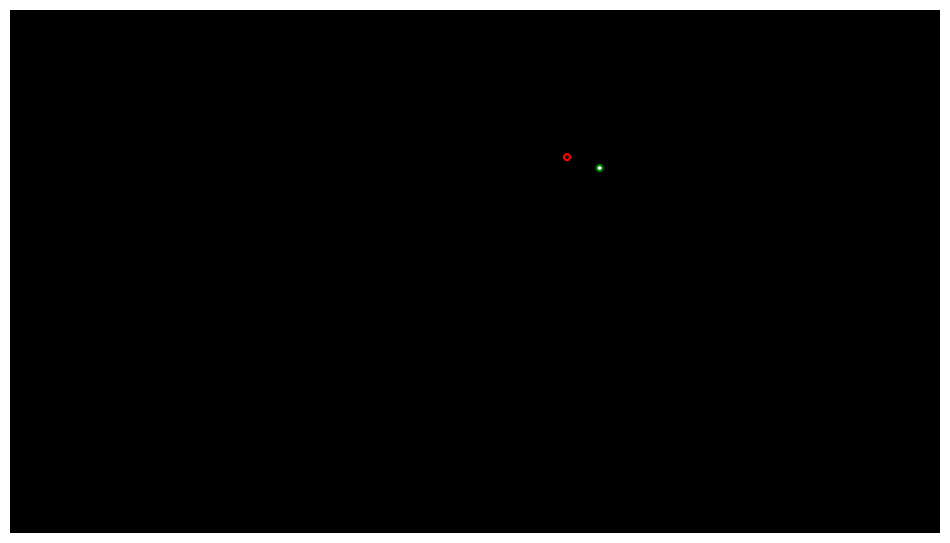


Metrics for image 1:
Coordinate error: 47.43 pixels


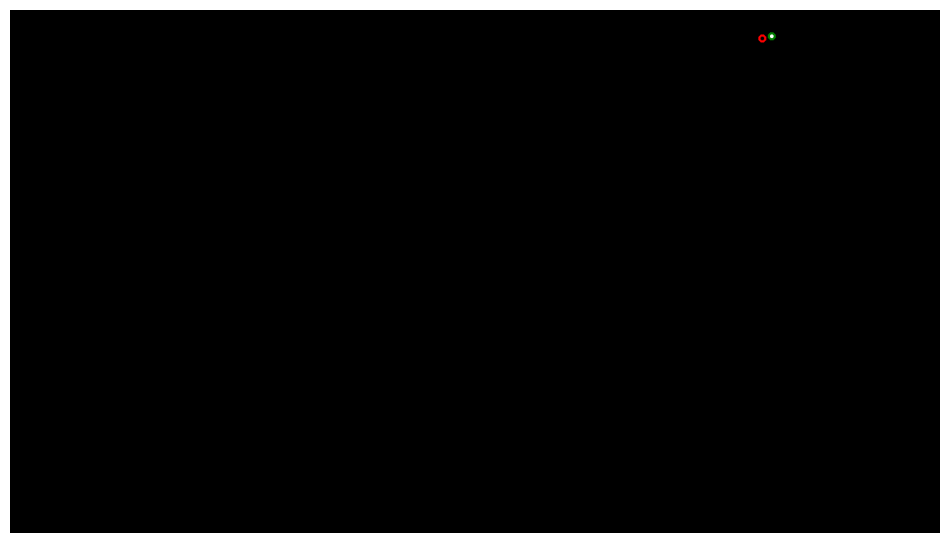


Metrics for image 2:
Coordinate error: 13.34 pixels


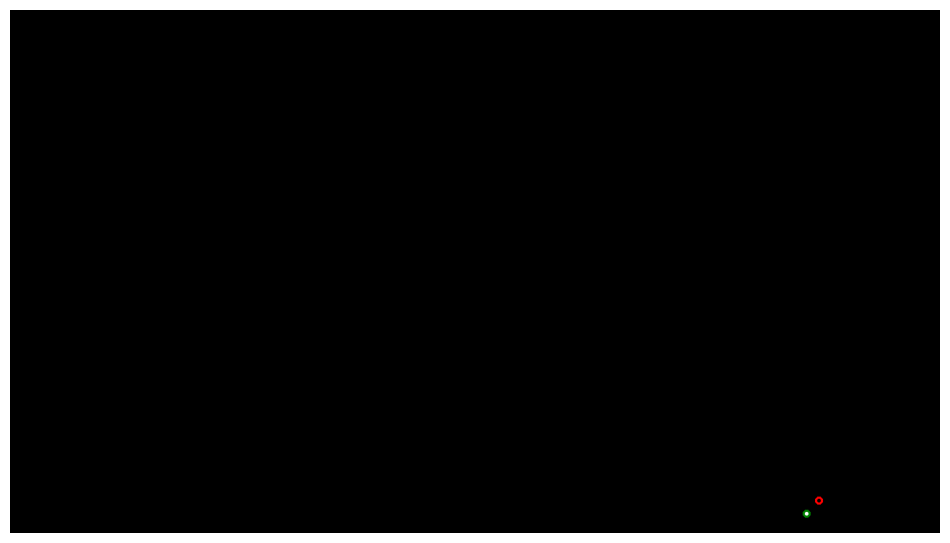


Metrics for image 3:
Coordinate error: 24.76 pixels


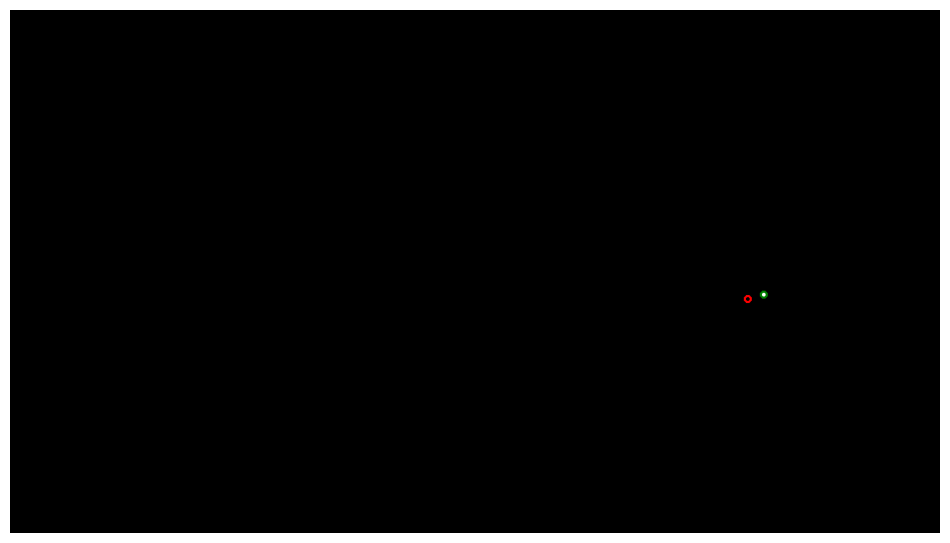


Metrics for image 4:
Coordinate error: 22.80 pixels


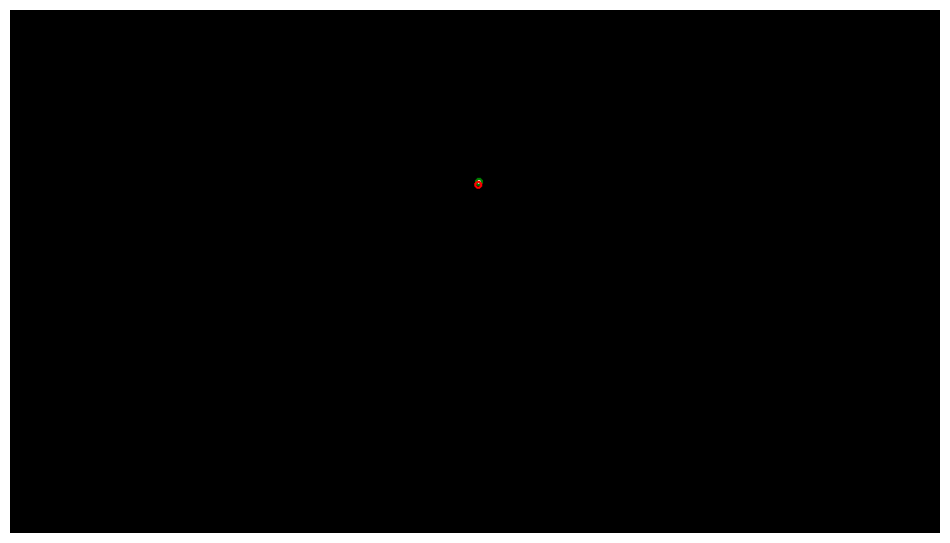


Metrics for image 5:
Coordinate error: 4.12 pixels


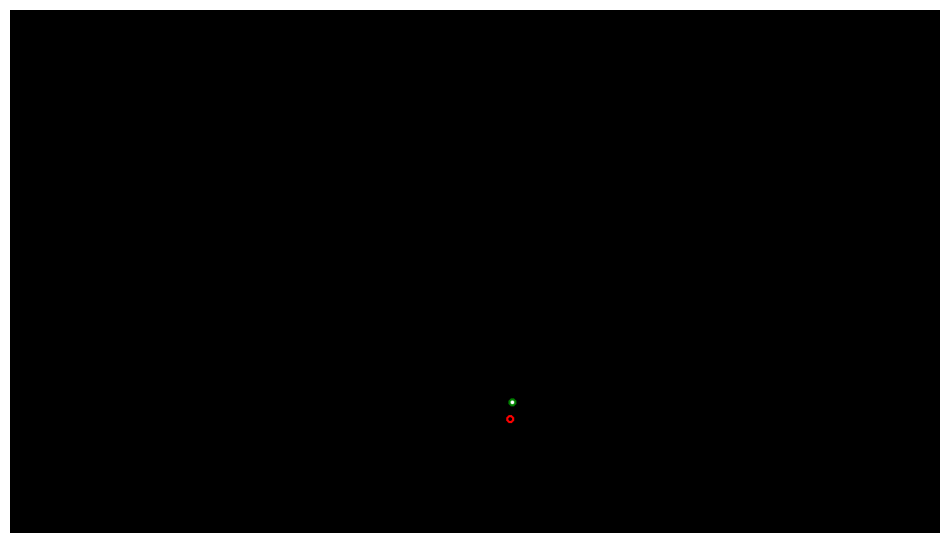


Metrics for image 6:
Coordinate error: 23.19 pixels


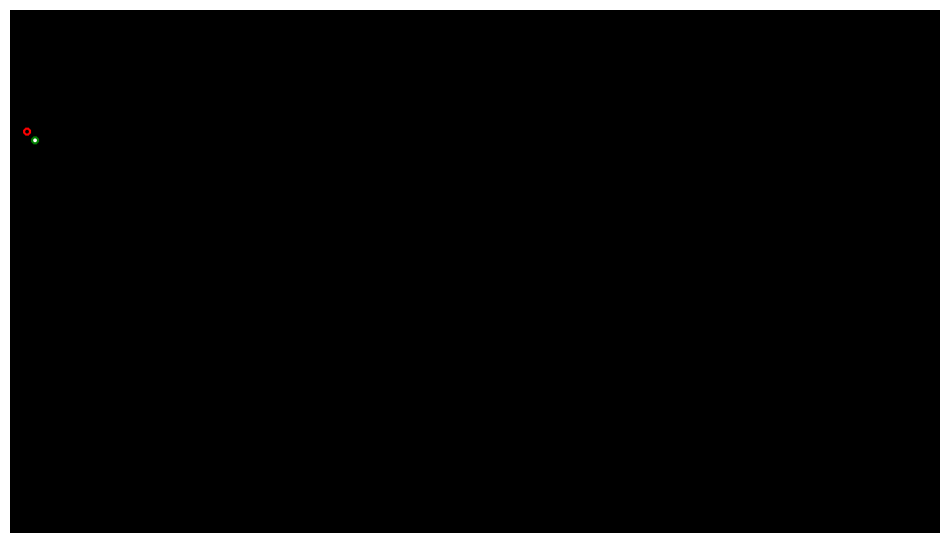


Metrics for image 7:
Coordinate error: 16.28 pixels


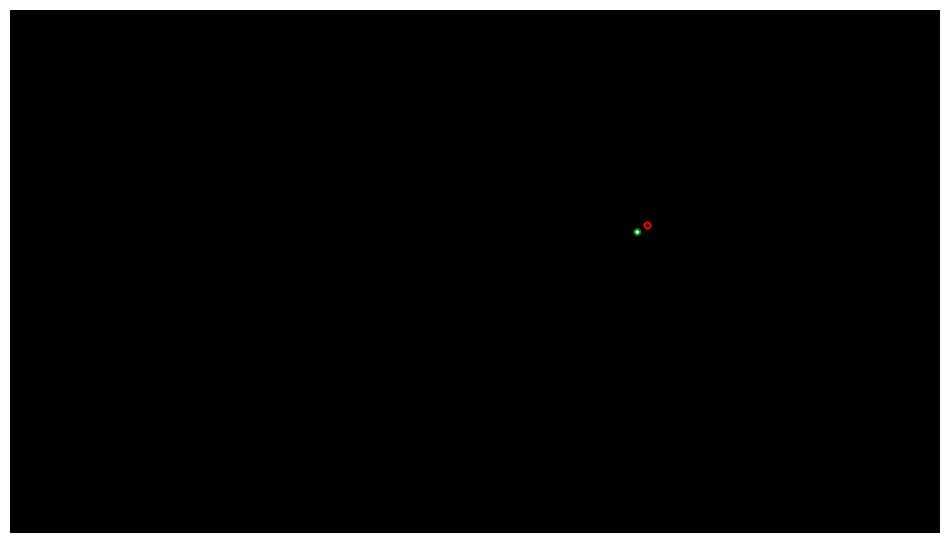


Metrics for image 8:
Coordinate error: 16.64 pixels


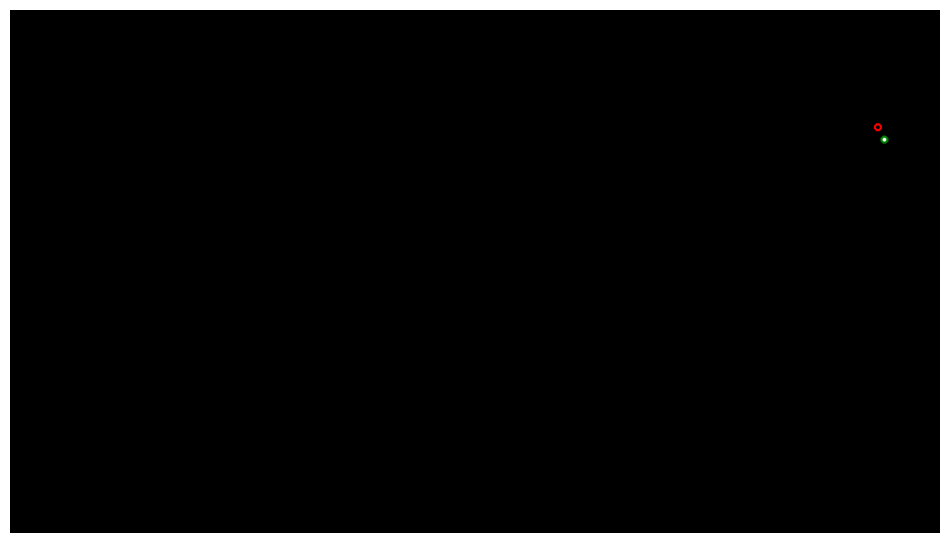


Metrics for image 9:
Coordinate error: 19.24 pixels

Final Results:
Coordinate Prediction:
  Average distance error: 19.00 pixels
  Standard deviation: 11.92 pixels
  Successful predictions: 10
Failed predictions at indices: []
Number of failures: 0


In [2]:
import torch
import gc
from contextlib import contextmanager
from datasets import load_dataset
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from transformers import MllamaForConditionalGeneration, MllamaProcessor
import math
import numpy as np

class ModelMemoryManager:
    @contextmanager
    def load_model(self, model_class, model_name, processor_class=None, peft_model_path=None, **kwargs):
        try:
            model = model_class.from_pretrained(model_name, **kwargs)
            if peft_model_path:
                from peft import PeftModel
                model = PeftModel.from_pretrained(model, peft_model_path)
            processor = processor_class.from_pretrained(model_name) if processor_class else None
            yield model, processor
        finally:
            del model
            if processor:
                del processor
            torch.cuda.empty_cache()
            gc.collect()

def calculate_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def process_batch(model, processor, dataset, start_index, batch_size, show_images=True):
    total_error = 0
    errors = []
    successful_predictions = 0
    failed_predictions = []

    for i in range(batch_size):
        index = start_index + i
        image = dataset[index]['images']
        prompt = dataset[index]['texts'][0]['user']
        
        # Process image
        img_for_model = image.convert("RGB")
        conversation = [
            {
                "role": "user",
                "content": [{"type": "image"}, {"type": "text", "text": prompt}],
            }
        ]
        prompt_text = processor.apply_chat_template(
            conversation, add_generation_prompt=True, tokenize=False
        )

        inputs = processor(img_for_model, prompt_text, return_tensors="pt").to(model.device)
        output = model.generate(
            **inputs,
            temperature=0.5,
            top_p=0.8,
            max_new_tokens=512,
        )

        pred = processor.decode(output[0])[len(prompt_text):]

        try:
            # Process coordinates
            true_coord = [float(x) for x in dataset[index]['texts'][0]['assistant'].strip('[]').split(',')]
            pred_numbers = pred.split('|>')[1].split('<|')[0].strip()
            pred_coord = [float(x) for x in pred_numbers.strip('[]').split(',')]
            
            distance = calculate_distance(true_coord, pred_coord)
            total_error += distance
            errors.append(distance)
            successful_predictions += 1
            
            if show_images:
                # Create a copy of the image for drawing
                img_display = image.copy()
                draw = ImageDraw.Draw(img_display)
                
                # Draw points
                radius = 5
                draw.ellipse([true_coord[0]-radius, true_coord[1]-radius, 
                            true_coord[0]+radius, true_coord[1]+radius], 
                           outline='green', width=3)
                draw.ellipse([pred_coord[0]-radius, pred_coord[1]-radius, 
                            pred_coord[0]+radius, pred_coord[1]+radius], 
                           outline='red', width=3)

                # Simple display with matplotlib
                plt.figure(figsize=(12,8))
                plt.imshow(img_display)
                plt.axis('off')
                plt.show()
                plt.close()
                
                print(f"\nMetrics for image {index}:")
                print(f"Coordinate error: {distance:.2f} pixels")
                
        except Exception as e:
            print(f"Error parsing prediction at index {index}: {e}")
            print(f"Raw prediction: {pred}")
            failed_predictions.append(index)
    
    if successful_predictions > 0:
        avg_error = total_error / successful_predictions
        std_error = np.std(errors)
        
        print(f"\nFinal Results:")
        print(f"Coordinate Prediction:")
        print(f"  Average distance error: {avg_error:.2f} pixels")
        print(f"  Standard deviation: {std_error:.2f} pixels")
        print(f"  Successful predictions: {successful_predictions}")
    print(f"Failed predictions at indices: {failed_predictions}")
    print(f"Number of failures: {len(failed_predictions)}")

def main():
    print("ANALYZING IMAGE ACCURACY")

    # Dataset loading and splitting
    split_ratio = 0.9
    dataset_dict = load_dataset("jwaters8978/synthetic_dataset", name="default")
    dataset = dataset_dict['train']
    #dataset = dataset.select(range(100))  # Uncomment to use a smaller subset for testing

    # First split into train and temp
    temp_dataset = dataset.train_test_split(test_size=0.2, shuffle=True, seed=42)
    train_data = temp_dataset['train']  # 80%

    # Second split: Split the temp into validation and test
    val_test_dataset = temp_dataset['test'].train_test_split(test_size=0.5, shuffle=True, seed=42)
    val_data = val_test_dataset['train']    # 10%
    test_data = val_test_dataset['test']    # 10%

    # Initialize model manager and process images
    manager = ModelMemoryManager()
    with manager.load_model(
        MllamaForConditionalGeneration,
        "meta-llama/Llama-3.2-11B-Vision-Instruct",
        MllamaProcessor,
        peft_model_path="finetuned_model/fine-tuned/peft_weights/",
        torch_dtype=torch.bfloat16,
        device_map="auto",
        use_safetensors=True
    ) as (model, processor):
        process_batch(model, processor, test_data, start_index=0, batch_size=10, show_images=True)

if __name__ == "__main__":
    main()